In [4]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [3]:
from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
image_folder ="/content/drive/MyDrive/Colab Notebooks/Computer_vision/images"

In [6]:
import os

image_files = [os.path.join(image_folder, file)
               for file in os.listdir(image_folder)
               if file.endswith(('png', 'jpg', 'jpeg'))]

images = [Image.open(file) for file in image_files]

In [7]:
target_image_path ="/content/drive/MyDrive/Colab Notebooks/Computer_vision/images/cat1.jpg"

In [8]:
target_image = Image.open(target_image_path)

In [9]:
def extraction_features(images):
  inputs = processor(images=images, return_tensors="pt",padding=True)
  with torch.no_grad():
    features = model.get_image_features(**inputs)

  return features


target_features = extraction_features([target_image])
image_features = extraction_features(images)


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(target_features, image_features).flatten()

indices = similarities.argsort()[::-1 ]

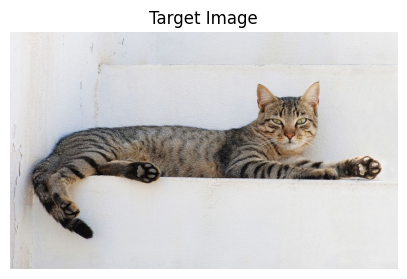

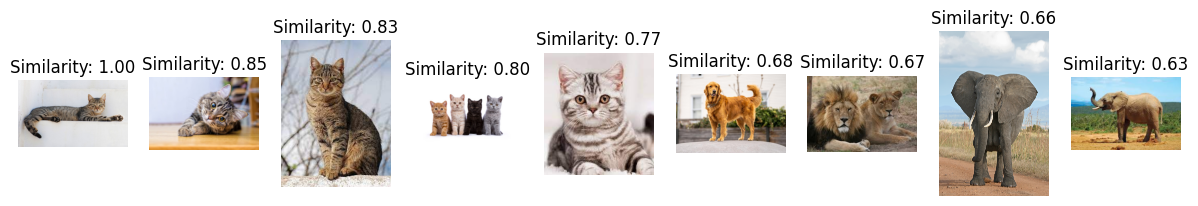

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

plt.imshow(target_image)

plt.title("Target Image")

plt.axis("off")

plt.show()

plt.figure(figsize=(15,5))

for i, idx in enumerate(indices):
  plt.subplot(1, len(images), i + 1)
  plt.imshow(images[idx])
  plt.title(f"Similarity: {similarities[idx]:.2f}")
  plt.axis("off")

plt.show()


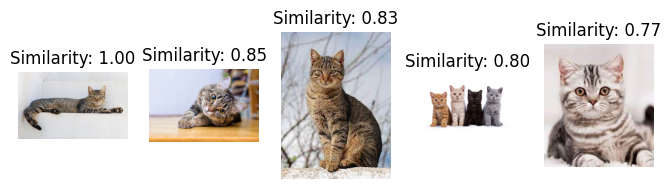

In [23]:
threshold = 0.75

filtered_indices = [i for i, sim in enumerate(similarities) if sim >= threshold]

filtered_indices = sorted(filtered_indices, key=lambda i: similarities [i], reverse=True)


plt.figure(figsize=(15,5))

for i, idx in enumerate(filtered_indices):
  plt.subplot(1, len(images), i + 1)
  plt.imshow(images[idx])
  plt.title(f"Similarity: {similarities[idx]:.2f}")
  plt.axis("off")

plt.show()


In [24]:
def get_images(target_image_path, images):
  target_image = Image.open(target_image_path)

  image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('png', 'jpg', 'jpeg'))]
  images = [Image.open(file) for file in image_files]

  target_features = extraction_features([target_image])
  image_features = extraction_features(images)

  similarities = cosine_similarity(target_features, image_features).flatten()

  threshold = 0.75

  filtered_indices = [i for i, sim in enumerate(similarities) if sim >= threshold]

  filtered_indices = sorted(filtered_indices, key=lambda i: similarities[i], reverse=True)


  plt.figure(figsize=(15, 5))
  for i, idx in enumerate(filtered_indices):
      plt.subplot(1, len(filtered_indices), i + 1)
      plt.imshow(images[idx])
      plt.title(f"Similarity: {similarities[idx]:.2f}")
      plt.axis("off")
  plt.show()

In [ ]:
target_features = extraction_features([target_image])
image_features = extraction_features(images)

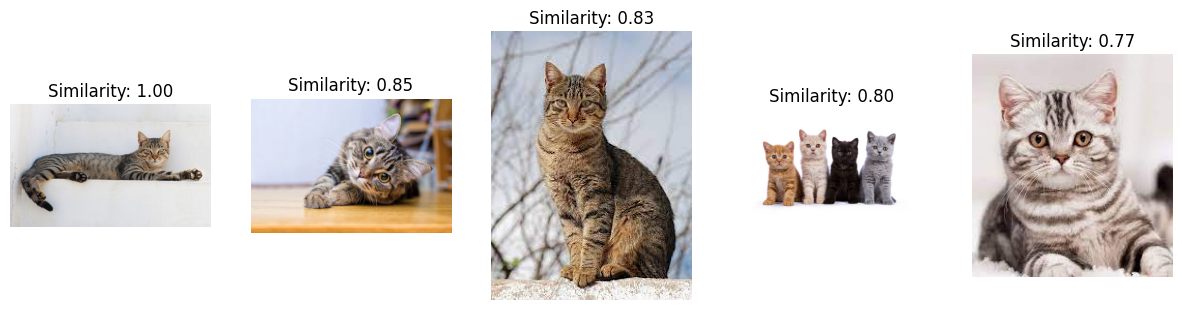

In [26]:
get_images(target_image_path, image_folder)